# Tarang Ranpara - 202011057

In [55]:
# importing all the required docs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Question 1

In [56]:
# choosing 200 samples from normal dist ~ (10, 20)
m1, sigma1 = 10, np.sqrt(20)
normal_dist1 = np.random.normal(m1, sigma1, 200)

In [57]:
# choosing 200 samples from normal dist ~ (20, 25)
m2, sigma2 = 20, np.sqrt(25)
normal_dist2 = np.random.normal(m2, sigma2, 200)

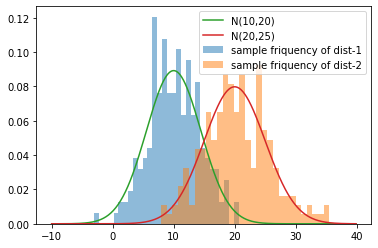

In [58]:
x = np.arange(-10,40,0.1)

# defining PDF for oth dist
pdf1 = (1/(sigma1*(np.sqrt(2*np.pi))))*np.exp(-(x-m1)**2 / (2*(sigma1**2)))
pdf2 = (1/(sigma2*(np.sqrt(2*np.pi))))*np.exp(-(x-m2)**2 / (2*(sigma2**2)))

# plotting histograms foth samples
plt.hist(normal_dist1 ,bins = 30 ,density=True,label='sample friquency of dist-1',alpha=0.5)
plt.hist(normal_dist2 ,bins = 30 ,density=True,label='sample friquency of dist-2',alpha=0.5)

# plot both PDFs    
plt.plot(x, pdf1, label = 'N(10,20)')
plt.plot(x, pdf2, label = 'N(20,25)')

plt.legend()
plt.show()

In [59]:
# calculate mean and std for 200 chosen semples
real_m1 = np.mean(normal_dist1)
real_sigma1 = np.std(normal_dist1)

real_m2 = np.mean(normal_dist2)
real_sigma2 = np.std(normal_dist2)

print(f'Dist-1 : mean = {real_m1}, std = {real_sigma1}')
print(f'Dist-1 : mean = {real_m2}, std = {real_sigma2}')

Dist-1 : mean = 10.17115148113, std = 4.169482112893355
Dist-1 : mean = 20.3981488646504, std = 5.327265670296047


In [60]:
def classify(
    apr_p1,   # apriori prob for 1 
    apr_p2,   # apriori prob for 2
    
    m1,       # mean
    sigma1,   # std
    
    m2,       # mean
    sigma2,   # std
    
    samples   # samples arr
):
    n = len(samples)
    result = [0] * n
    
    for i in range(n):
        sample = samples[i]
        
        # calculate prob for both classes 
        p1x = (1/(sigma1*(np.sqrt(2*np.pi))))*np.exp(-(sample-m1)**2 / (2*(sigma1**2)))
        p2x = (1/(sigma2*(np.sqrt(2*np.pi))))*np.exp(-(sample-m2)**2 / (2*(sigma2**2)))
        
        # classification using bayes decision rule
        result[i] = 'b' if p1x * apr_p1 > p2x * apr_p1 else 'g'
        
    return result

In [61]:
def gen_data_and_classify(
    apr_p1,   # apriori prob for 1 
    apr_p2,   # apriori prob for 2
):
    
    global real_m1       # mean
    global real_sigma1   # std
    
    global real_m2       # mean
    global real_sigma2   # std
    
    global x             # data
    global pdf1          # PDF for dist1
    global pdf2          # PDF for dist2
    
    # drawing 40 samples 
    samples = np.random.uniform(5,20,40)
    
    # calling classifier
    classes = classify(apr_p1, apr_p2, real_m1, real_sigma1, real_m2, real_sigma2, samples)
    print('classes:', classes)
    
    # plotting both distributions
    plt.plot(x,pdf1,'b-',label = 'PDF1')
    plt.plot(x,pdf2,'g-',label = 'PDF2')
    
    # calculating PDF
    pdf = apr_p1*pdf1  + apr_p2*pdf2
    
    #Plotting Result
    plt.plot(x,pdf,'r-',label = 'PDF')
    plt.scatter(samples,np.zeros_like(samples),c = classes)
    
    plt.legend()
    plt.show()

classes: ['b', 'b', 'b', 'g', 'b', 'b', 'b', 'g', 'b', 'g', 'b', 'b', 'b', 'b', 'b', 'g', 'b', 'b', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'g', 'b', 'g', 'b', 'g', 'g', 'b', 'b', 'g', 'g', 'b', 'g', 'b']


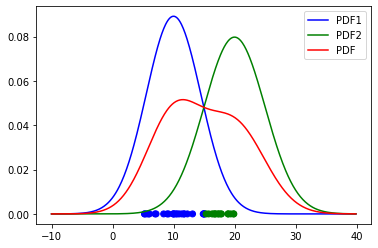

In [62]:
gen_data_and_classify(0.5, 0.5)

classes: ['g', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'g', 'b', 'g', 'g', 'b', 'b', 'b', 'b', 'g', 'g', 'b', 'b', 'g', 'b', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'b', 'g', 'b']


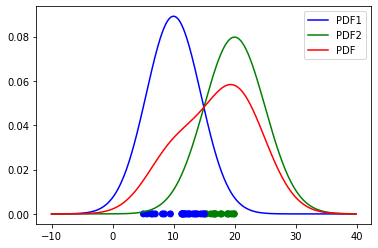

In [63]:
gen_data_and_classify(0.3, 0.7)

classes: ['b', 'g', 'b', 'b', 'b', 'b', 'g', 'b', 'b', 'b', 'b', 'b', 'g', 'b', 'g', 'b', 'b', 'b', 'b', 'b', 'g', 'b', 'g', 'g', 'b', 'b', 'g', 'g', 'b', 'b', 'b', 'g', 'g', 'b', 'b', 'g', 'b', 'b', 'b', 'b']


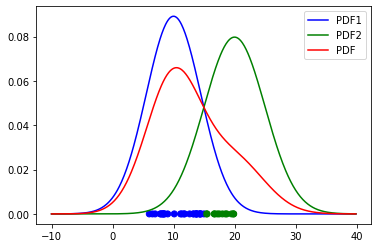

In [64]:
gen_data_and_classify(0.7, 0.3)

# Question 2

In [65]:
# reading data
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

# naming columns
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'flower_class']

# droppig null values
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,flower_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
# grouping data by flower class
grouped_df = df.groupby(df.flower_class)

# fetching each group individually
setosa = grouped_df.get_group("Iris-setosa")
versicolor = grouped_df.get_group("Iris-versicolor")
virginica = grouped_df.get_group("Iris-virginica")

In [67]:
# separating data and labels
x_setosa = setosa.iloc[:,:-1]
y_setosa = setosa.iloc[:,-1]

x_virginica = virginica.iloc[:,:-1]
y_virginica = virginica.iloc[:,-1]

x_versicolor = versicolor.iloc[:,:-1]
y_versicolor = versicolor.iloc[:,-1]

In [96]:
class Classifier:
    
    # fit, predict methods --> following standard practice.
    
    def __init__(self):
        
        # initialising all classes as 0
        self.mu_setosa = 0
        self.cov_setosa = 0
        self.mu_versicolor = 0
        self.cov_versicolor = 0
        self.mu_virginica = 0
        self.cov_virginica = 0
        
    def fit(self,x_train_setosa,x_train_versicolor,x_train_virginica):
    
        # mu,cov for versicolor
        self.mu_versicolor = np.mean(x_train_versicolor).to_numpy()
        self.cov_versicolor = np.cov(x_train_versicolor.T)
        
        # mu,cov for setosa
        self.mu_setosa = np.mean(x_train_setosa).to_numpy()
        self.cov_setosa = np.cov(x_train_setosa.T)

        # mu,cov for virginica
        self.mu_virginica = np.mean(x_train_virginica).to_numpy()
        self.cov_virginica = np.cov(x_train_virginica.T)
        
        # on each iter, object with added learning will be returned 
        return self
    
    def predict(self,x_test):
        x_test = x_test.to_numpy()
        y_predict = []
        
        for x in x_test:

            # calculate probability for each class
            p_versicolor = (1/np.sqrt(np.linalg.det(self.cov_versicolor)))*np.exp((-1/2)*(np.subtract(x,self.mu_versicolor.T)@np.linalg.inv(self.cov_versicolor)@(np.subtract(x,self.mu_versicolor.T).T)))
            p_setosa = (1/np.sqrt(np.linalg.det(self.cov_setosa)))*np.exp((-1/2)*(np.subtract(x,self.mu_setosa.T)@np.linalg.inv(self.cov_setosa)@(np.subtract(x,self.mu_setosa.T).T)))
            p_virginica = (1/np.sqrt(np.linalg.det(self.cov_virginica)))*np.exp((-1/2)*(np.subtract(x,self.mu_virginica.T)@np.linalg.inv(self.cov_virginica)@(np.subtract(x,self.mu_virginica.T).T)))
            
            # classification 
            
            # if p_setosa is highest, then assign label setosa
            if p_setosa >= p_versicolor and p_setosa > p_virginica:
                y_predict.append("Iris-setosa")

            # if p_versicolor is highest, then assign label versicolor
            elif p_versicolor > p_setosa and p_versicolor >= p_virginica:
                y_predict.append("Iris-versicolor")

            # if p_virginica is highest, then assign label virginica
            else:
                y_predict.append("Iris-virginica")
                
        return y_predict
    
    def get_accuracy(self,y_test,y_predict):
        error = 0
        
        for x,y in zip(y_test,y_predict):
            # for each incorrect prediction
            if x != y:
                error += 1
        
        # averaging the accuracies measured
        acc = ((len(y_test)-error)/len(y_test))*100
        return acc

In [97]:
classifier = Classifier()
iterations = 10
acc_list = []

for i in range(iterations):
    
    # dividing data in train, test 
    x_train_setosa, x_test_setosa, y_train_setosa, y_test_setosa  = train_test_split(x_setosa, y_setosa,test_size=0.2)
    x_train_versicolor, x_test_versicolor, y_train_versicolor, y_test_versicolor= train_test_split(x_versicolor, y_versicolor, test_size=0.2)
    x_train_virginica, x_test_virginica,  y_train_virginica, y_test_virginica,= train_test_split(x_virginica, y_virginica, test_size=0.2)

    x_test = pd.concat([x_test_setosa , x_test_versicolor, x_test_virginica])
    y_test = list(pd.concat([y_test_setosa, y_test_versicolor, y_test_virginica]))
    
    # fitting the classifier on train data
    classifier = classifier.fit(x_train_setosa,x_train_versicolor,x_train_virginica)
    
    # predict using the fit model
    y_predict = classifier.predict(x_test)
    
    # calculate accuracy
    acc = classifier.get_accuracy(y_test,y_predict)
    print(f"iter - {i+1} :  accuracy - {acc} ")
    
    acc_list.append(acc)

average_acc = sum(acc_list)/len(acc_list)

print("FINAL accuracy :-",average_acc)

iter - 1 :  accuracy - 93.33333333333333 
iter - 2 :  accuracy - 100.0 
iter - 3 :  accuracy - 96.66666666666667 
iter - 4 :  accuracy - 100.0 
iter - 5 :  accuracy - 100.0 
iter - 6 :  accuracy - 100.0 
iter - 7 :  accuracy - 96.66666666666667 
iter - 8 :  accuracy - 100.0 
iter - 9 :  accuracy - 100.0 
iter - 10 :  accuracy - 96.66666666666667 
FINAL accuracy :- 98.33333333333333
